In [200]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import tensorflow as tf
import keras
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("/home/agastya/data")
%matplotlib inline

In [201]:
#Importing important packages
import warnings
from sklearn.metrics import mean_squared_error
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
import warnings

In [202]:
#import data
data = pd.read_csv("/home/agastya/data/DataSet_Q2/TrainingData.csv")

In [203]:
#Exploratory Data analysis
data.head()

,Unnamed: 0,YR,QR,BL,AS,DW,LL,ZY,QJ,C1,C2,C3,C4,C5
0,1,1993,1,A,2822.030932,7762.204749,3669.404853,2931.093590,10595.278120,11,19,3,10,18
1,2,1993,1,B,8306.139802,3592.249122,6361.923481,7558.887238,3819.739029,28,16,19,30,42
2,3,1993,1,C,12273.947280,5356.626792,5586.193383,8559.345123,8809.098512,12,15,14,19,23
3,4,1993,2,A,7819.374160,11247.887710,1458.187114,2265.455618,9315.001710,13,20,7,20,29
4,5,1993,2,B,8163.361092,2114.394785,4458.097484,8257.170066,3812.831606,26,16,18,32,38


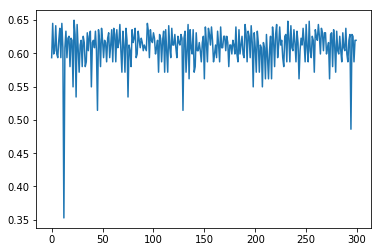

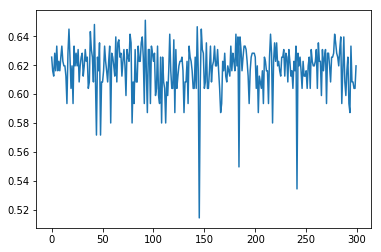

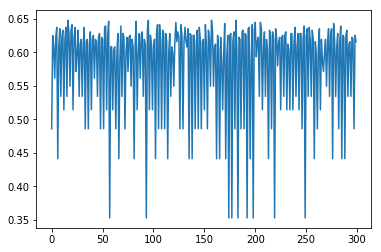

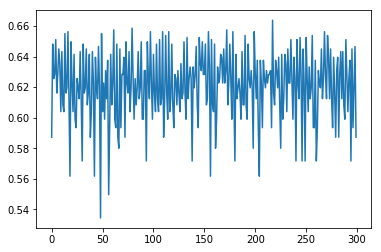

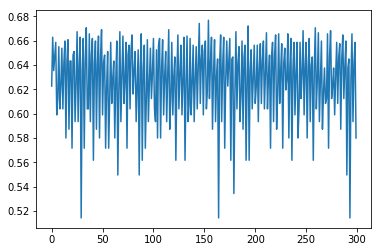

In [178]:
#Plotting graphs to check for regularity and trends
for i in ['C1', 'C2', 'C3', 'C4', 'C5']:
    plt.plot(data[i])
    plt.show()

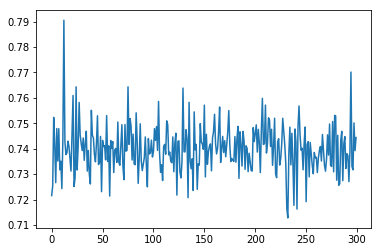

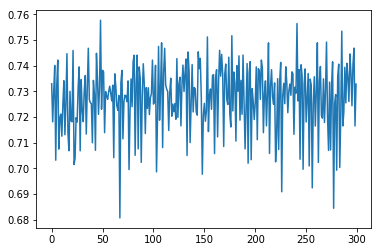

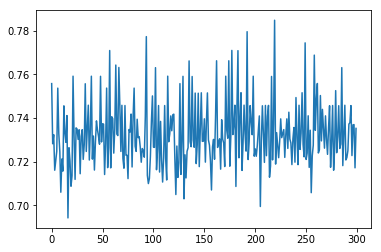

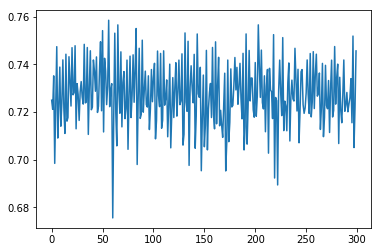

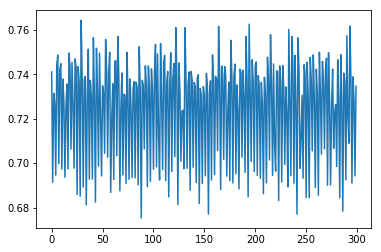

In [179]:
for i in ['AS', 'DW', 'LL', 'ZY', 'QJ']:
    plt.plot(data[i])
    plt.show()

In [63]:
#Below functions are created for performing grid search over (p,d,q) parameters for the ARIMA Model
import warnings
from sklearn.metrics import mean_squared_error
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    if p == 0 and q == 0 and d == 0:
                        print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# load dataset
# evaluate parameters
#p_values = [0, 1, 2, 4, 6, 8, 10]
#d_values = range(0, 3)
#q_values = range(0, 3)
#warnings.filterwarnings("ignore")
#evaluate_models(series.values, p_values, d_values, q_values)

In [14]:
#getting predictions for C1, C2, C3, C4, C5
from pandas import Series
results = {}
stats = ['C1', 'C2', 'C3', 'C4', 'C5']
division = ['A', 'B', 'C']
for stat in stats:
    div_results = {}
    _ = []
    for j in range(2):
        for i in range(4):
            for div in division:
                data1 = data[data['BL'] == div].reset_index()
                data1 = data1[['QR', 'YR', stat]]
                data1['QR'] = data1['QR'].apply(lambda x: 'Jan' if x == 1 else (' Apr' if x == 2 else ( 'Jul' if x== 3 else 'Oct')))
                data1['date'] = data1['QR'] + data['YR'].astype(str)
                data1['date'] = pd.to_datetime(data1['date'])
                data1 = data1.drop(['YR', 'QR'], axis=1)
                data1 = data1[['date', stat]]
                data1.to_csv('data1.csv', index=False)
                data1 = Series.from_csv('data1.csv', header=0)
                X = data1.values
                from statsmodels.tsa.arima_model import ARIMA
                X = X.astype('float32')
                size = len(X)
                train = list(X)
                model = ARIMA(train, order=(4, 0, 0))
                model_fit = model.fit(disp=False, transparams=True)
                start_index = len(train)
                end_index = start_index + 4 
                forecast, stderr, conf = model_fit.forecast(alpha=0.0001, steps=4)
                _.append(np.absolute(conf[i][j]))
    results[str(stat)] = _
temp = pd.DataFrame(results)
temp.to_csv('sub1.csv', index=False, header=False)

In [23]:
## Testing the standard error for baseline model with p,d,q values = 4, 0, 0 respectivalydef inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

from statsmodels.tsa.arima_model import ARIMA
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
model = ARIMA(train, order=(4, 0, 0))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast(alpha=0.01)
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('99%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 9150.457
Forecast: 7052.152
Standard Error: 2116.540
99% Confidence Interval: 1600.306 to 12503.998


In [6]:
##Getting predictions for test data to check relecvance of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series= data1
# split into train and test sets
X = series.values
train, test = X[0:-4], X[-4:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,0,0))
    model_fit = model.fit(disp=False)
    forecast, stderr, conf = model_fit.forecast(alpha=0.01)
    # one step forecast
    yhat = model_fit.forecast()[0]
    print(model_fit.params)
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

NameError: name 'data1' is not defined

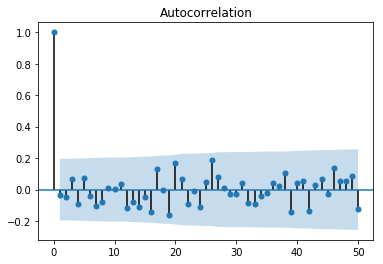

In [177]:
#AC Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=50)
plt.show()

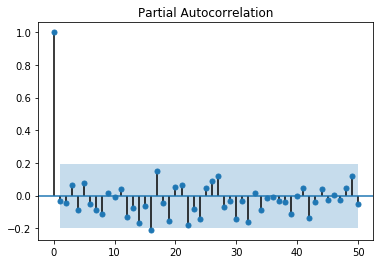

In [176]:
#PAC plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
plt.show()

In [ ]:
##Performed grid search for [C1, C2, C3, C4, C5] and ['AS', DW, LL, QJ AND ZY]
stats = ['AS', 'DW', 'LL', 'ZY', 'QJ']
division = ['A', 'B', 'C']
for stat in stats:
    print(stat)
    for div in division:
        print(div)
        data1 = data[data['BL'] == div].reset_index()
        data1 = data1[['QR', 'YR', stat]]
        data1['QR'] = data1['QR'].apply(lambda x: 'Jan' if x == 1 else (' Apr' if x == 2 else ( 'Jul' if x== 3 else 'Oct')))
        data1['date'] = data1['QR'] + data['YR'].astype(str)
        data1['date'] = pd.to_datetime(data1['date'])
        data1 = data1.drop(['YR', 'QR'], axis=1)
        data1 = data1[['date', stat]]
        data1.to_csv('data1.csv', index=False)
        data1 = Series.from_csv('data1.csv', header=0)
        series=data1
        p_values = [0, 1, 2, 4, 6, 8, 10]
        d_values = range(0, 3)
        q_values = range(0, 3)
        warnings.filterwarnings("ignore")
        evaluate_models(series.values, p_values, d_values, q_values)
        print('****************************************************')

AS
A
ARIMA(0, 0, 0) MSE=3145809.054


In [204]:
## Applying multiple log transformations to make the data stationary
data = pd.read_csv("/home/agastya/data/DataSet_Q2/TrainingData.csv")
data['C3'] = data['C3'].apply(lambda x: np.nanmedian(data['C3']) if x == 0 else x)
data[['AS', 'DW', 'LL', 'ZY', 'QJ']] = np.divide(data[['AS', 'DW', 'LL', 'ZY', 'QJ']],
                                                 data[['C1', 'C2', 'C3', 'C4', 'C5']])
data[['AS', 'DW', 'LL', 'ZY', 'QJ']] = np.log1p(np.log1p(np.log1p(np.log1p(data[['AS', 'DW', 'LL', 'ZY', 'QJ']]))))
data[['C1', 'C2', 'C3', 'C4', 'C5']] = np.log1p(np.log1p(np.log1p(np.log1p(data[['C1', 'C2', 'C3', 'C4', 'C5']]))))

In [205]:
#Forecasting quantities
results = {}
stats = ['C1', 'C2', 'C3', 'C4', 'C5']
division = ['A', 'B', 'C']


for stat in stats:
    div_results = {}
    _ = []
    for j in range(2):
        for i in range(4):
            for div in division:
                #Preparing the data into an single series
                order = (4, 1, 0)
                data1 = data[data['BL'] == div].reset_index()
                data1 = data1[['QR', 'YR', stat]]
                data1['QR'] = data1['QR'].apply(lambda x: 'Jan' if x == 1 else (' Apr' if x == 2 else ( 'Jul' if x== 3 else 'Oct')))
                data1['date'] = data1['QR'] + data['YR'].astype(str)
                data1['date'] = pd.to_datetime(data1['date'])
                data1 = data1.drop(['YR', 'QR'], axis=1)
                data1 = data1[['date', stat]]
                data1.to_csv('data1.csv', index=False)
                data1 = Series.from_csv('data1.csv', header=0)
                X = data1.values
                
                #Import and create list
                from statsmodels.tsa.arima_model import ARIMA
                X = X.astype('float32')
                size = len(X)
                train = list(X)
                
                #Choosing best values from Grid search
                """if stats == 'C1' and div == 'A':
                    order = (8, 0, 1)
                elif stats == 'C1' and div == 'B':
                    order = (4, 0, 1)
                elif stats == 'C1' and div == 'C':
                    order = (0, 0, 1)
                elif stats == 'C2' and div == 'A':
                    order = (6, 0, 0)
                elif stats == 'C4' and div == 'C':
                    order = (4, 0, 2)
                elif stats == 'C5' and div == 'A':
                    order = (6, 0, 1)
                elif stats == 'C5' and div == 'B':
                    order = (4, 0, 2)"""
                
                #Fitting the model
                model = ARIMA(train, order=order)
                model_fit = model.fit(disp=False, transparams=True)
                
                #Forecasting for subsequent 4 quarters
                start_index = len(train)
                end_index = start_index + 4 
                forecast, stderr, conf = model_fit.forecast(alpha=0.01, steps=4)
                #appending the values to the respective interval
                _.append(np.absolute(conf[i][j]))
    results[str(stat)] = _
temp1 = pd.DataFrame(results)
temp1 = np.exp(np.exp(np.exp(np.exp(temp1) - 1) - 1) - 1) - 1
#temp1 = np.exp(np.exp(np.exp(np.exp(temp1))))
temp1.to_csv('sub2.csv', index=False, header=False)


## Forecasting total losses
results = {}
stats = ['AS', 'DW', 'LL', 'ZY', 'QJ']
division = ['A', 'B', 'C']

for stat in stats:
    div_results = {}
    _ = []
    for j in range(2):
        for i in range(4):
            for div in division:
                order = (4, 1, 0)
                data1 = data[data['BL'] == div].reset_index()
                data1 = data1[['QR', 'YR', stat]]
                data1['QR'] = data1['QR'].apply(lambda x: 'Jan' if x == 1 else (' Apr' if x == 2 else ( 'Jul' if x== 3 else 'Oct')))
                data1['date'] = data1['QR'] + data['YR'].astype(str)
                data1['date'] = pd.to_datetime(data1['date'])
                data1 = data1.drop(['YR', 'QR'], axis=1)
                data1 = data1[['date', stat]]
                data1.to_csv('data1.csv', index=False)
                data1 = Series.from_csv('data1.csv', header=0)
                X = data1.values
                
                #Setting and importing ARIMA
                from statsmodels.tsa.arima_model import ARIMA
                X = X.astype('float32')
                size = len(X)
                train = list(X)
                
                #choosing parameters from grid search
                """if stats == 'AS' and div == 'A':
                    order = (4, 0, 0)
                elif stats == 'AS' and div == 'B':
                    order = (0, 1, 1)
                elif stats == 'AS' and div == 'C':
                    order = (2, 0, 0)
                elif stats == 'DW' and div == 'A':
                    order = (6, 0, 0)"""
                
                model = ARIMA(train, order=order)
                model_fit = model.fit(disp=False, transparams=True)
                
                #Forecasting fot the subsequent quarters of respective divisions
                start_index = len(train)
                end_index = start_index + 4 
                forecast, stderr, conf = model_fit.forecast(alpha=0.01, steps=4)
                _.append(np.absolute(conf[i][j]))
    results[str(stat)] = _
temp = pd.DataFrame(results)
temp = np.exp(np.exp(np.exp(np.exp(temp) - 1) - 1) - 1) - 1
#temp = np.exp(np.exp(np.exp(np.exp(temp))))
temp.to_csv('sub1.csv', index=False, header=False)

In [206]:
temp2 = np.multiply(temp, temp1)
temp2 = pd.DataFrame(temp2)
temp2.to_csv('sub_final.csv', index=False, header=False)

In [164]:
#Create differenced time series
'''def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)'''
 
# invert differenced value
'''def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
'''
##Didn't try it - results in minor degrading of results. Instead set d = 1

In [ ]:
# seasonal difference
'''X = series.values
quarters = 4
differenced = difference(X, quarters)'''
# fit model
'''model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)'''
# multi-step out-of-sample forecast
'''start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)'''
# invert the differenced forecast to something usable
'''history = [x for x in X]
for yhat in forecast:
    inverted = inverse_difference(history, yhat, quarters)
    history.append(inverted)'''

In [207]:
import pyflux as pf

In [208]:
#Forecasting quantities
results = {}
stats = ['C1', 'C2', 'C3', 'C4', 'C5']
division = ['A', 'B', 'C']


for stat in stats:
    div_results = {}
    _ = []
    for j in range(2):
        for i in range(4):
            for div in division:
                #Preparing the data into an single series
                order = (4, 1, 0)
                data1 = data[data['BL'] == div].reset_index()
                data1 = data1[['QR', 'YR', stat]]
                data1['QR'] = data1['QR'].apply(lambda x: 'Jan' if x == 1 else (' Apr' if x == 2 else ( 'Jul' if x== 3 else 'Oct')))
                data1['date'] = data1['QR'] + data['YR'].astype(str)
                data1['date'] = pd.to_datetime(data1['date'])
                data1 = data1.drop(['YR', 'QR'], axis=1)
                data1 = data1[['date', stat]]
                data1.to_csv('data1.csv', index=False)
                data1 = Series.from_csv('data1.csv', header=0)
                X = data1.values
                
                #Import and create list
                import pyflux as pf
                X = X.astype('float32')
                size = len(X)
                train = list(X)
                
                #Choosing best values from Grid search
                """if stats == 'C1' and div == 'A':
                    order = (8, 0, 1)
                elif stats == 'C1' and div == 'B':
                    order = (4, 0, 1)
                elif stats == 'C1' and div == 'C':
                    order = (0, 0, 1)
                elif stats == 'C2' and div == 'A':
                    order = (6, 0, 0)
                elif stats == 'C4' and div == 'C':
                    order = (4, 0, 2)
                elif stats == 'C5' and div == 'A':
                    order = (6, 0, 1)
                elif stats == 'C5' and div == 'B':
                    order = (4, 0, 2)"""
                
                #Fitting the model
                model = pf.ARIMA(data = np.array(train), ar=4, integ=0, ma=0, family=pf.Normal())
                model_fit = model.fit()
                
                #Forecasting for subsequent 4 quarters
                start_index = len(train)
                end_index = start_index + 4 
                conf = model.predict(h=4, intervals=True)
                conf = conf[['1% Prediction Interval', '99% Prediction Interval']]
                _.append(np.absolute(conf.iloc[i,j]))
    results[str(stat)] = _
temp1 = pd.DataFrame(results)
temp1 = np.exp(np.exp(np.exp(np.exp(temp1) - 1) - 1) - 1) - 1
#temp1 = np.exp(np.exp(np.exp(np.exp(temp1))))
temp1.to_csv('sub2.csv', index=False, header=False)


## Forecasting total losses
results = {}
stats = ['AS', 'DW', 'LL', 'ZY', 'QJ']
division = ['A', 'B', 'C']

for stat in stats:
    div_results = {}
    _ = []
    for j in range(2):
        for i in range(4):
            for div in division:
                order = (4, 1, 0)
                data1 = data[data['BL'] == div].reset_index()
                data1 = data1[['QR', 'YR', stat]]
                data1['QR'] = data1['QR'].apply(lambda x: 'Jan' if x == 1 else (' Apr' if x == 2 else ( 'Jul' if x== 3 else 'Oct')))
                data1['date'] = data1['QR'] + data['YR'].astype(str)
                data1['date'] = pd.to_datetime(data1['date'])
                data1 = data1.drop(['YR', 'QR'], axis=1)
                data1 = data1[['date', stat]]
                data1.to_csv('data1.csv', index=False)
                data1 = Series.from_csv('data1.csv', header=0)
                X = data1.values
                
                #Setting and importing ARIMA
                import pyflux
                X = X.astype('float32')
                size = len(X)
                train = list(X)
                
                #choosing parameters from grid search
                """if stats == 'AS' and div == 'A':
                    order = (4, 0, 0)
                elif stats == 'AS' and div == 'B':
                    order = (0, 1, 1)
                elif stats == 'AS' and div == 'C':
                    order = (2, 0, 0)
                elif stats == 'DW' and div == 'A':
                    order = (6, 0, 0)"""
                
                model = pf.ARIMA(data = np.array(train), ar=4, integ=0, ma=0, family=pf.Normal())
                model_fit = model.fit()
                
                #Forecasting for subsequent 4 quarters
                start_index = len(train)
                end_index = start_index + 4 
                conf = model.predict(h=4, intervals=True)
                conf = conf[['1% Prediction Interval', '99% Prediction Interval']]
                _.append(np.absolute(conf.iloc[i,j]))
    results[str(stat)] = _
temp = pd.DataFrame(results)
temp = np.exp(np.exp(np.exp(np.exp(temp) - 1) - 1) - 1) - 1
#temp = np.exp(np.exp(np.exp(np.exp(temp))))
temp.to_csv('sub1.csv', index=False, header=False)

In [184]:
model = pf.ARIMA(data = np.array(train), ar=4, integ=0, ma=0, family=pf.Normal())
model_fit = model.fit()

In [190]:
a = model.predict(h=4, intervals=True)

In [191]:
a.iloc[:,4]

100    0.766145
101    0.767780
102    0.767557
103    0.767174
Name: 99% Prediction Interval, dtype: float64

In [193]:
a = a[['1% Prediction Interval', '99% Prediction Interval']]

In [196]:
a.iloc[3,0]

0.71896197152412777

In [197]:
a

,1% Prediction Interval,99% Prediction Interval
100,0.719524,0.766145
101,0.720515,0.767780
102,0.720063,0.767557
103,0.718962,0.767174


In [209]:
temp2 = np.multiply(temp, temp1)
temp2 = pd.DataFrame(temp2)
temp2.to_csv('sub_final.csv', index=False, header=False)